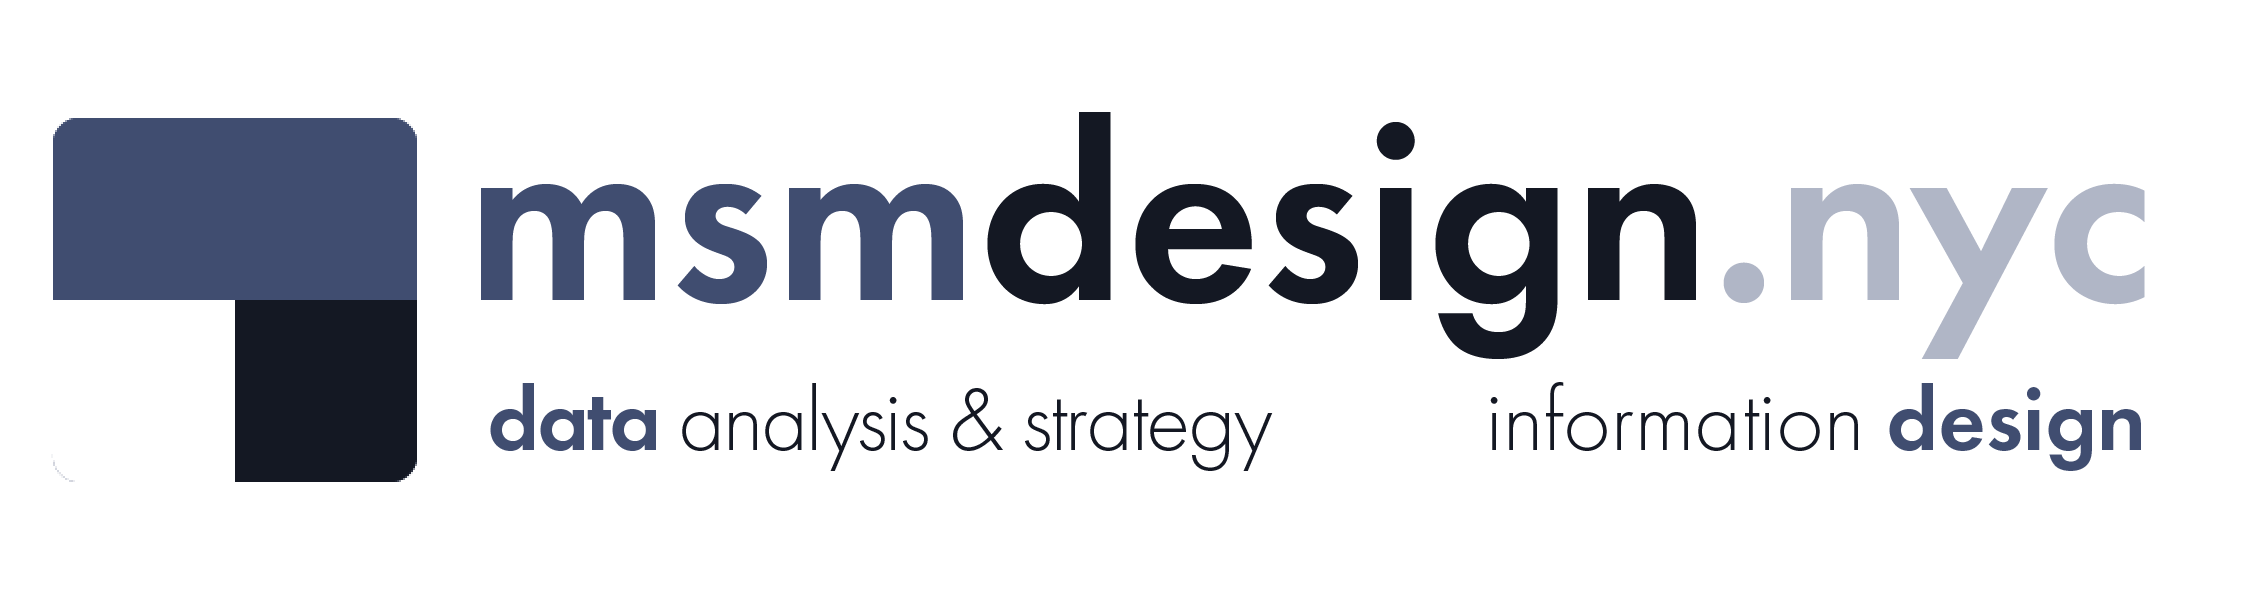

---
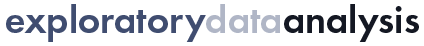

---

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.


**Dataset Analyzed:** *Demographics by Community District*

**About This Dataset:** This dataset provides a Demographic breakdown of only DYCD-funded participants within Community District of NYC. This data is used to measure the numbers of the different population groups that are served by DYCD for a Borough, and Community. Data provided by Department of Youth and Community Development (DYCD), the City of New York: https://data.cityofnewyork.us/Social-Services/2019-Volunteers-Count-Report-Neighborhoods/72r6-mtgs



**Acknowledgements:** NYC open Data https://opendata.cityofnewyork.us/


**EDA Catalogue Number:** MSM-032


**EDA Publication Date:** Tuesday, March 1, 2022


**Language:** Python


**Libraries Used:** NumPy, pandas, matplotlib


**EDA Author:** David White


**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

## **0. Setup the workspace**

In [2]:
# import the libraries needed for data analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# load the data stored in a csv file (hosted on GitHub) and assign it to a variable

volunteers = pd.read_csv('https://raw.githubusercontent.com/davidwhitemsm/selected-open-datasources/master/DS-NYC-004-2019_Volunteers_Count_Report_-_Neighborhoods.csv',encoding='utf-8')

In [4]:
# confirm that the data has loaded correctly by displaying the first few lines and the last few lines of the DataFrame

volunteers.head()

,Organization/ City Agency/ Division Name,Street Address/Mailing Address,City,State,Postcode,Year Surveyed,Total Vounteers,Youth volunteers,Adult Volunteers,Older adult Volunteers,...,SI - Westerleigh,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,"20/20 Vision for Schools, Inc. d/b/a Thrive Co...",8225 5th Avenue #323,Brooklyn,NY,11209,2019,500,200,260,40,...,NaN,BROOKLYN,40.624082,-74.024838,310.0,43.0,142.0,3152153.0,3.060090e+09,Bay Ridge
1,826NYC,372 Fifth Ave,Brooklyn,NY,11215,2019,803,0,759,44,...,Westerleigh,BROOKLYN,40.671365,-73.984492,306.0,39.0,137.0,3021351.0,3.009870e+09,Park Slope-Gowanus
2,9/11 Memorial & Museum,"200 Liberty St, 16th floor",New York,NY,10281,2019,774,38,0,0,...,NaN,MANHATTAN,40.711425,-74.015442,101.0,1.0,31704.0,1000057.0,1.000160e+09,Battery Park City-Lower Manhattan
3,A Free Bird,146 Smith Street,Brooklyn,NY,11201,2019,58,0,58,0,...,NaN,BROOKLYN,40.686827,-73.990412,302.0,33.0,43.0,3001229.0,3.001930e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill
4,Abbott House,1775 Grandconcourse,The Bronx,NY,10453,2019,2,0,2,0,...,NaN,BRONX,40.846089,-73.909879,205.0,14.0,22701.0,2007858.0,2.028228e+09,Mount Hope


In [5]:
volunteers.tail(3)

,Organization/ City Agency/ Division Name,Street Address/Mailing Address,City,State,Postcode,Year Surveyed,Total Vounteers,Youth volunteers,Adult Volunteers,Older adult Volunteers,...,SI - Westerleigh,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
541,Young Israel of Forest Hills Senior League,68-07 Burns Street,Forest Hills,NY,11375,2019,53,5,18,30,...,Westerleigh,QUEENS,40.721357,-73.851655,406.0,29.0,711.0,4077448.0,4.032340e+09,Forest Hills
542,Youth Action YouthBuild East Harlem,208 118th Street,New York,NY,10026,2019,42,2,40,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543,YWCA of Queens,42-07 Parsons Blvd.,Flushing,NY,11355,2019,163,0,0,0,...,Westerleigh,QUEENS,40.757857,-73.819077,407.0,20.0,861.0,4583346.0,4.053750e+09,East Flushing


## **1. Wrap our heads around what is contained in the dataset**

In [6]:
# how many rows and columns are contained in our dataset?

volunteers.shape

(544, 218)

In [7]:
# what is the index (set of row labels) for our dataset?

volunteers.index

RangeIndex(start=0, stop=544, step=1)

In [10]:
# what are the columns of our dataset?

print(volunteers.columns.tolist())

['Organization/ City Agency/ Division Name', 'Street Address/Mailing Address', 'City', 'State', 'Postcode', 'Year Surveyed', 'Total Vounteers', 'Youth volunteers', 'Adult Volunteers', 'Older adult Volunteers', 'Organization Type', 'Interest Areas', 'Boroughs  Served', 'Special Populations Served', 'BK - Bath Beach', 'BK - Bay Ridge', 'BK - Bedford', 'BK - Bensonhurst East', 'BK - Bensonhurst West', 'BK - Borough Park', 'BK - Brighton Beach', 'BK - Brooklyn Heights-Cobble Hill', 'BK - Brownsville', 'BK - Bushwick North', 'BK - Bushwick South', 'BK - Canarsie', 'BK - Carroll Gardens-Columbia Street-Red Hook', 'BK - Clinton Hill', 'BK - Crown Heights North', 'BK - Crown Heights South', 'BK - Cypress Hills-City Line', 'BK - DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill', 'BK - Dyker Heights', 'BK - East Flatbush-Farragut', 'BK - East New York', 'BK - East New York (Pennsylvania Ave)', 'BK - East Williamsburg', 'BK - Erasmus', 'BK - Flatbush', 'BK - Flatlands', 'BK - Fort Greene', 'BK - 

In [24]:
# due to the large number of columns, subset the columns needed for our research at this point

volunteers = volunteers.loc[:,['Organization/ City Agency/ Division Name','Street Address/Mailing Address', 
                               'City', 'State', 'Postcode', 'Year Surveyed', 
                               'Total Vounteers', 'Youth volunteers', 'Adult Volunteers', 'Older adult Volunteers', 
                               'Organization Type', 'Interest Areas', 'Boroughs  Served', 'Special Populations Served',
                              'Borough', 'Latitude', 'Longitude', 
                               'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA']]

In [27]:
# confirm that the columns have been subset as expected

volunteers.shape

(544, 23)

In [28]:
volunteers.columns

Index(['Organization/ City Agency/ Division Name',
       'Street Address/Mailing Address', 'City', 'State', 'Postcode',
       'Year Surveyed', 'Total Vounteers', 'Youth volunteers',
       'Adult Volunteers', 'Older adult Volunteers', 'Organization Type',
       'Interest Areas', 'Boroughs  Served', 'Special Populations Served',
       'Borough', 'Latitude', 'Longitude', 'Community Board',
       'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [29]:
# what kind of data does each columns in our dataset hold?

volunteers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Organization/ City Agency/ Division Name  544 non-null    object 
 1   Street Address/Mailing Address            544 non-null    object 
 2   City                                      544 non-null    object 
 3   State                                     544 non-null    object 
 4   Postcode                                  544 non-null    int64  
 5   Year Surveyed                             544 non-null    int64  
 6   Total Vounteers                           544 non-null    int64  
 7   Youth volunteers                          544 non-null    object 
 8   Adult Volunteers                          544 non-null    object 
 9   Older adult Volunteers                    544 non-null    object 
 10  Organization Type                     

**First impressions of our dataset:**

- The dataset is 6 columns wide and 100 rows long
- each row is a business
- The 'a' column contains datetime information
- The dataset contains information from January 1, 1900 through February 2, 2000

- Our dataset's categorical variables are:
  - 'a'
  - 'b'
  - 'c'
- Our dataset's numeric variables are:
  - 'x'
  - 'y'
  - 'z'
- These columns contain complete information:
  - 'a'
  - 'b'
  - 'c'
- These columns are missing at least some data:
  - 'x'
  - 'y'
  - 'z'

## **2. Identify and subset the data that's relevant to our research**

**Let's take a closer look at the following variables:**

- A
- B
- D
- F

## **3. Summarize and describe the contents of the dataset**

## **4. Final takeaways** 

***